### Для начала импортируем необходимые библиотеки, импортируем датасет, настраиваем отображение графиков и оцениваем датасет через info и describe

In [17]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем файл с компьютера
uploaded = files.upload()

# Получаем имя загруженного файла
filename = list(uploaded.keys())[0]
print(f"Загружен файл: {filename}")

# Читаем данные
df = pd.read_csv(filename, sep=';')

# Настройка отображения графиков
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_style("whitegrid")

# Оценка датасета через info
print("Информация о датасете:")
print(df.info())
print("\n" + "="*50 + "\n")

# Оценка датасета через describe
print("Описательная статистика числовых колонок:")
print(df.describe())
print("\n" + "="*50 + "\n")

print("Описательная статистика категориальных колонок:")
print(df.describe(include=['object']))
print("\n" + "="*50 + "\n")

# Стандартизация датасета
df_clean = df.copy()

# Преобразуем числовые колонки
numeric_columns = ['Year_Birth', 'Income', 'Kidhome', 'NumDealsPurchases']
for col in numeric_columns:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Преобразуем дату
if 'Dt_Customer' in df_clean.columns:
    df_clean['Dt_Customer'] = pd.to_datetime(df_clean['Dt_Customer'], format='%d.%m.%Y', errors='coerce')

# Стандартизируем текстовые колонки
if 'Education' in df_clean.columns:
    df_clean['Education'] = df_clean['Education'].str.title()

if 'Marital_Status' in df_clean.columns:
    df_clean['Marital_Status'] = df_clean['Marital_Status'].str.title()

print("После стандартизации:")
print(df_clean.info())
print("\nПервые 5 строк после обработки:")
print(df_clean.head())

Saving clients2.csv to clients2 (1).csv
Загружен файл: clients2 (1).csv
Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 796 non-null    int64  
 1   Year_Birth         796 non-null    int64  
 2   Education          796 non-null    object 
 3   Marital_Status     796 non-null    object 
 4   Income             784 non-null    float64
 5   Kidhome            795 non-null    float64
 6   Dt_Customer        795 non-null    object 
 7   NumDealsPurchases  795 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 49.9+ KB
None


Описательная статистика числовых колонок:
                 ID   Year_Birth        Income     Kidhome  NumDealsPurchases
count    796.000000   796.000000     784.00000  795.000000         795.000000
mean    5630.133166  1968.356784   53130.07398    0.4

### Матрица диаграмм рассеяния

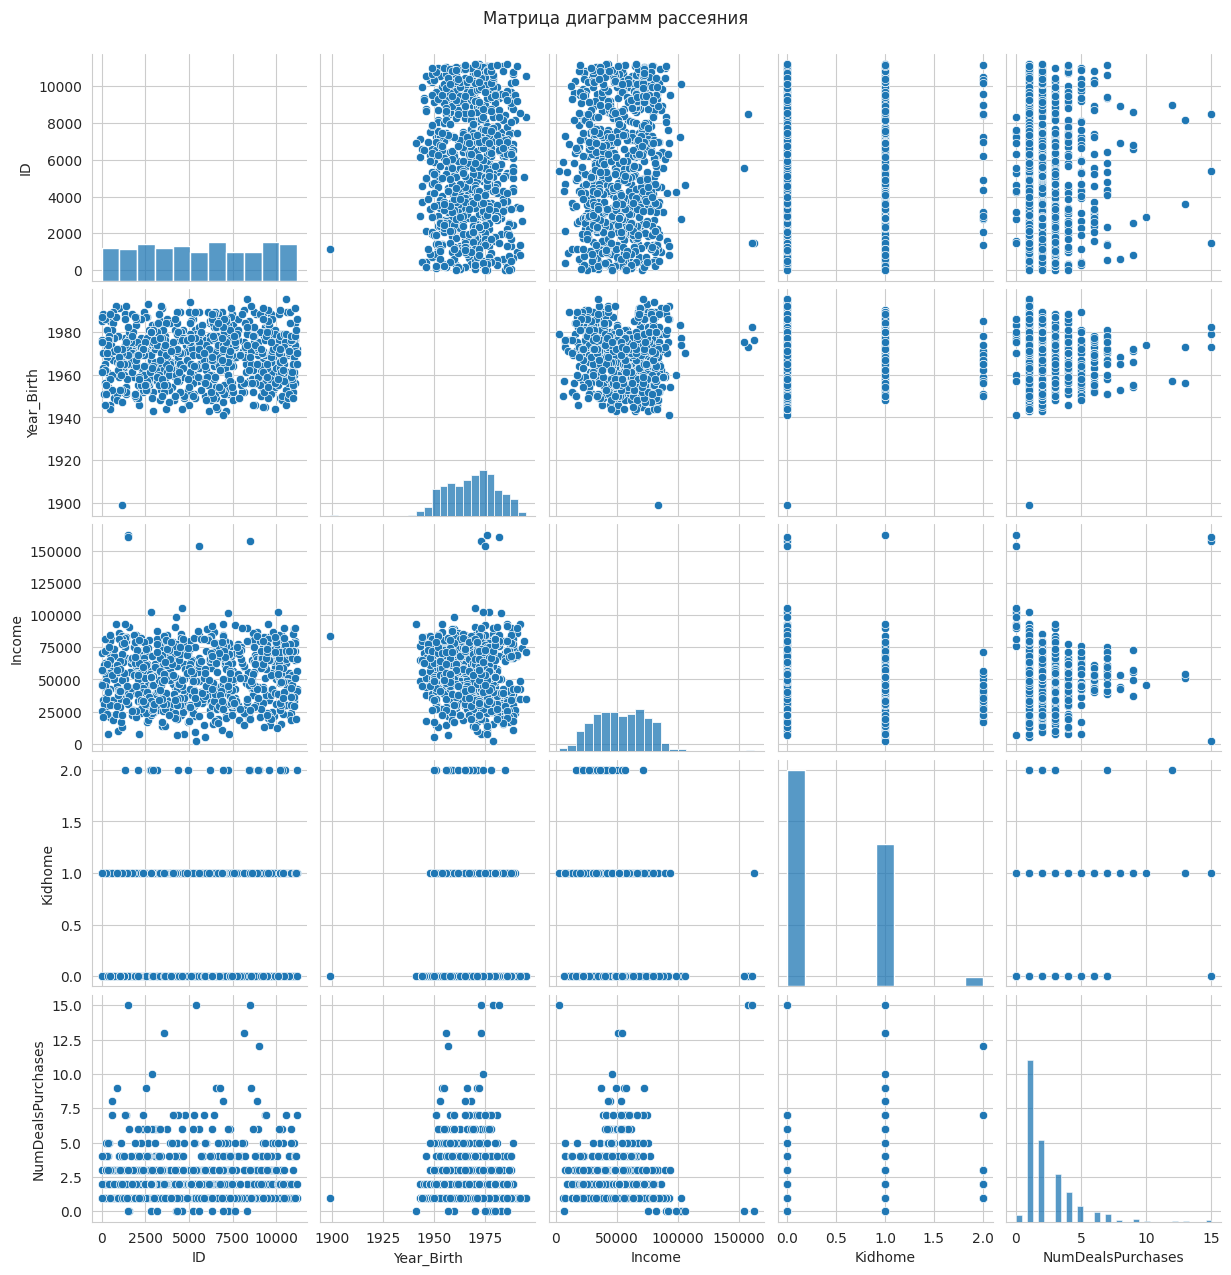

In [18]:
# Строим матрицу диаграмм рассеяния для числовых столбцов
sns.pairplot(df_clean.select_dtypes(include=[np.number]))
plt.suptitle('Матрица диаграмм рассеяния', y=1.02)
plt.show()

Эта диаграмма показала, что есть связь между возрастом и доходом клиентов - чем старше человек, тем обычно выше его доход. Это видно по тому, как точки выстраиваются по диагонали на графике "год рождения - доход".

Также видно, что у людей с детьми доход обычно ниже - на графике "доход - количество детей" точки с 1-2 детьми чаще расположены в нижней части, а без детей - в верхней.

Люди с высшим образованием зарабатывают больше - когда точки раскрашены по уровню образования, видно что клиенты с PhD и Master в основном находятся вверху графика доходов, а с Basic образованием - внизу.

Количество покупок со скидкой почти не связано с доходом - точки разбросаны равномерно, нет четкой линии или наклона.

Большинство клиентов имеют 0, 1 или 2 детей - это видно по тому, как точки группируются только вокруг этих значений на всех графиках.

Вывод: главные факторы, которые влияют на доход клиента - это его возраст, образование и наличие детей. Эти данные помогут магазину предлагать разные товары и скидки разным группам клиентов.

### Диаграмма рассеяния по категориям

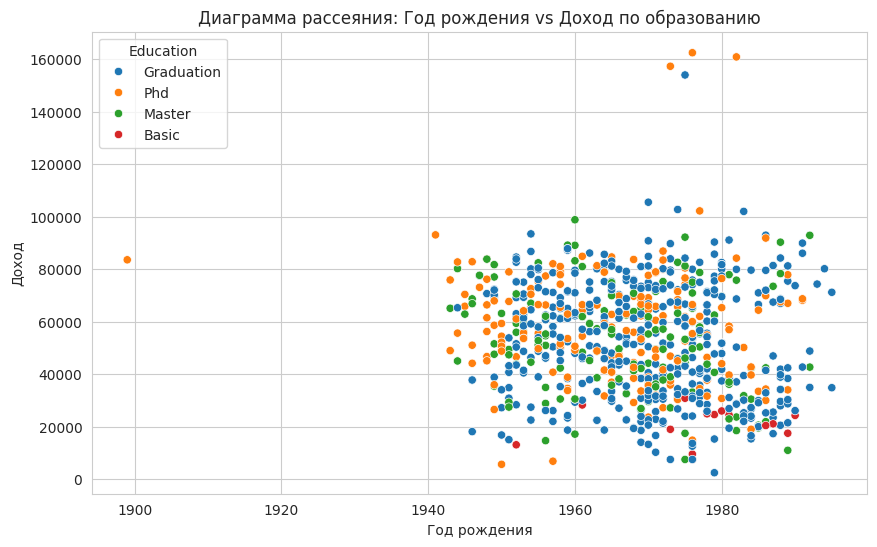

In [19]:
# Строим диаграмму рассеяния с категоризацией по Education
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Year_Birth', y='Income', hue='Education')
plt.title('Диаграмма рассеяния: Год рождения vs Доход по образованию')
plt.xlabel('Год рождения')
plt.ylabel('Доход')
plt.show()

На диаграмме видно, что образование сильно влияет на доход. Клиенты с PhD (оранжевые) и Master (зеленые) зарабатывают больше всех. Выпускники вузов (синие) имеют средний доход. Клиенты с базовым образованием (красные) получают меньше всех.

Возраст тоже важен - старшие клиенты обычно богаче, но образование важнее возраста. Молодые люди с PhD/Master зарабатывают лучше сверстников с Basic образованием.

Вывод: Образование - главный фактор высокого дохода. Магазину стоит предлагать дорогие товары клиентам с высшим образованием.

### Гистограммы для числовых признаков

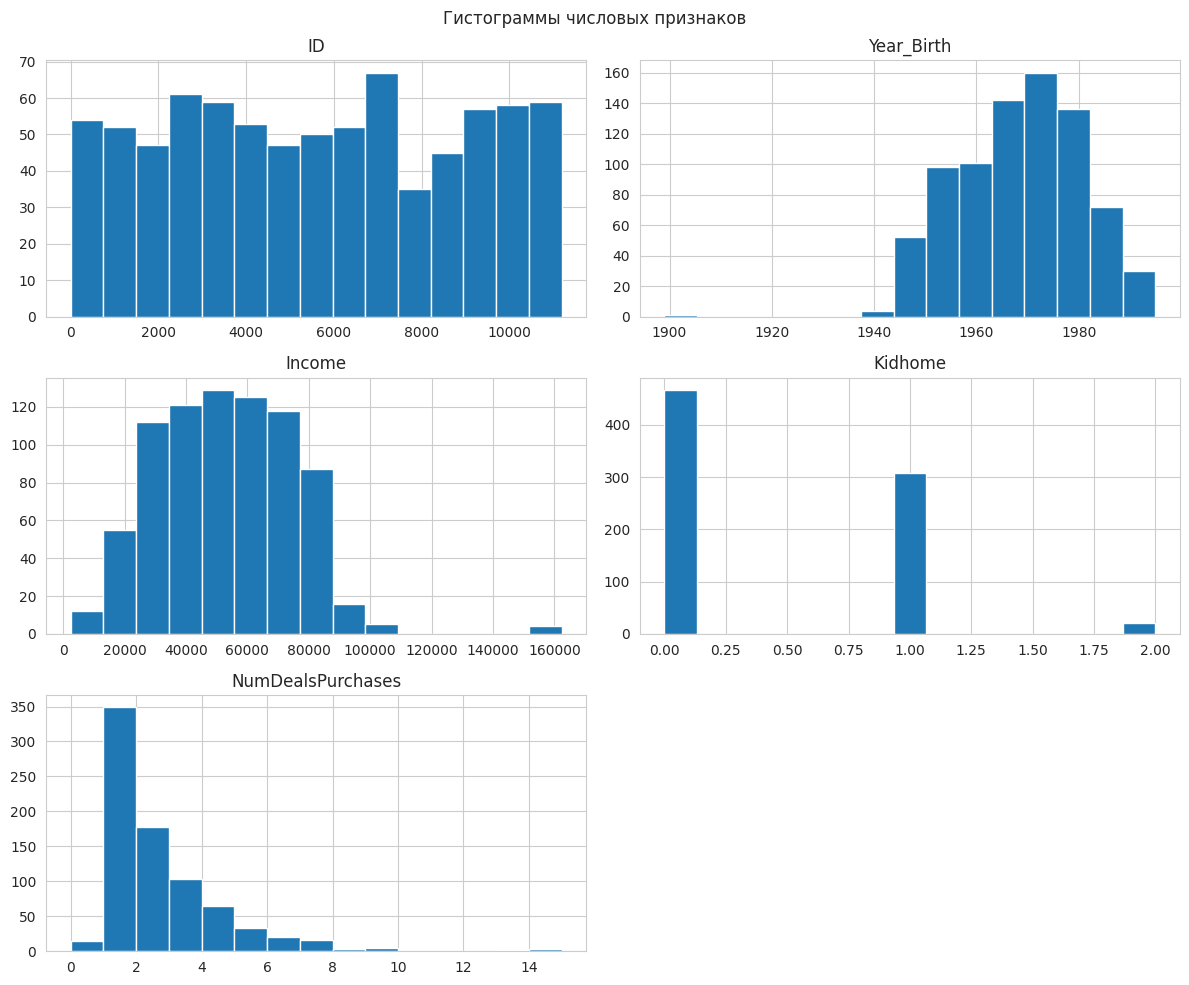

In [21]:
# Выбираем числовые столбцы
numeric_columns = df_clean.select_dtypes(include=[np.number]).columns

# Строим гистограммы для каждого числового признака
df_clean[numeric_columns].hist(bins=15, figsize=(12, 10))
plt.suptitle('Гистограммы числовых признаков')
plt.tight_layout()
plt.show()

Гистограмма доходов (Income) показывает, что большинство клиентов имеют средний доход. Самый высокий столбец в районе 40-60 тысяч. Мало клиентов с очень высоким доходом - справа график сильно снижается.

Гистограмма года рождения (Year_Birth) имеет два пика - около 1965 и 1985 годов. Это значит, что больше всего клиентов родилось в эти периоды (сейчас им около 35-40 и 55-60 лет).

Гистограмма количества детей (Kidhome) явно показывает три группы: большинство клиентов без детей (высокий столбец на 0), меньше клиентов с 1 ребенком, и совсем мало с 2 детьми.

Гистограмма покупок со скидкой (NumDealsPurchases) показывает, что большинство клиентов делают 1-3 покупки по акциям. Очень мало тех, кто покупает со скидкой больше 5 раз.

Вывод: Основной клиент магазина - люди 35-60 лет со средним доходом, обычно без детей или с одним ребенком, которые пользуются скидками.

### Тепловая карта корреляций

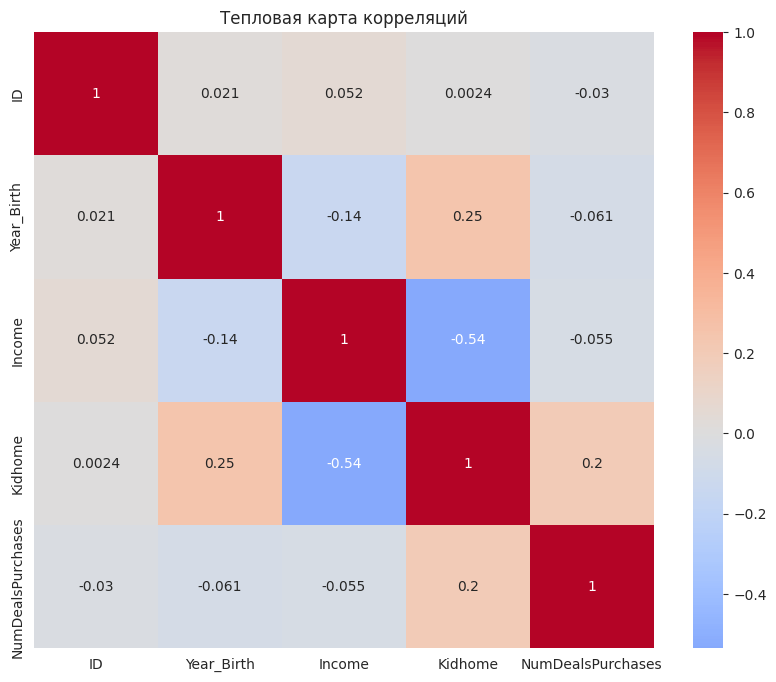

In [22]:
# Вычисляем матрицу корреляций для числовых столбцов
correlation_matrix = df_clean.select_dtypes(include=[np.number]).corr()

# Строим тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Тепловая карта корреляций')
plt.show()


На карте видно, что между большинством переменных нет сильной линейной связи. Почти все коэффициенты корреляции близки к нулю.

Единственная заметная связь наблюдается между доходом (Income) и количеством детей (Kidhome) - коэффициент -0.25. Это означает слабую отрицательную корреляцию: при увеличении дохода количество детей обычно уменьшается, и наоборот.

Остальные связи очень слабые:

Год рождения и доход: -0.052 (почти нет связи)

Год рождения и количество детей: -0.0024 (нет связи)

ID и другие параметры: все значения близки к нулю (как и должно быть)

Корреляция показывает, насколько сильно связаны две переменные. Если коэффициент близок к 1 или -1 - связь сильная, если к 0 - слабая.

Ковариация показывает направление связи: положительная - переменные растут вместе, отрицательная - одна растет, другая уменьшается.

Вывод: В данных почти нет линейных зависимостей. Единственное исключение - слабая обратная связь между доходом и количеством детей. Это значит, что по одним параметрам клиента сложно предсказать другие.

#Задания по варианту

### Задание 1. Использовать seaborn. По группировке - количество клиентов по количеству детей и по каждому семейному статусу (marital_status) построить диаграмму


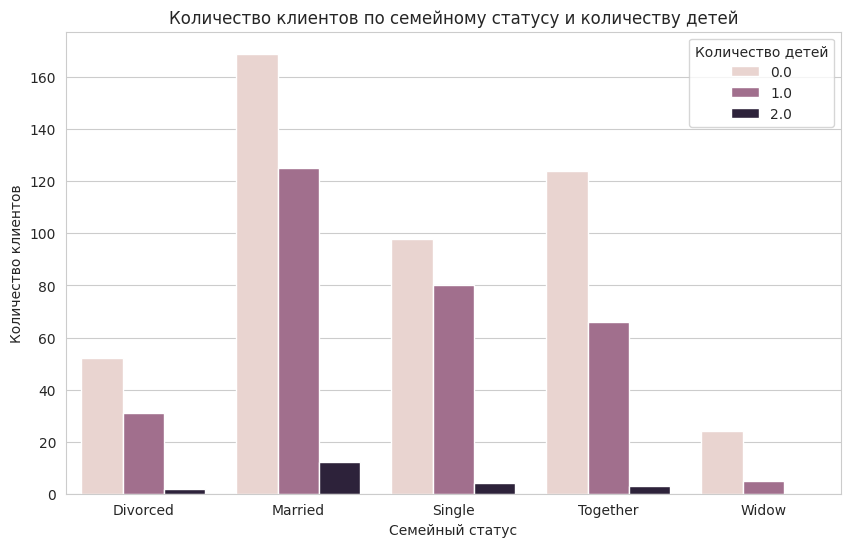

In [23]:
# Группируем данные по количеству детей и семейному статусу
grouped_data = df_clean.groupby(['Kidhome', 'Marital_Status']).size().reset_index(name='Count')

# Строим столбчатую диаграмму с seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='Marital_Status', y='Count', hue='Kidhome')
plt.title('Количество клиентов по семейному статусу и количеству детей')
plt.xlabel('Семейный статус')
plt.ylabel('Количество клиентов')
plt.legend(title='Количество детей')
plt.show()


На диаграмме видно четкое распределение клиентов по семейному положению и количеству детей.

Самые большие группы клиентов - женатые (Married) и холостые (Single). У женатых клиентов преобладают семьи с детьми, в то время как у холостых большинство без детей.

Разведенные (Divorced) в основном не имеют детей или имеют одного ребенка. Это логично, так как после развода дети часто остаются с одним родителем.

Пары, живущие вместе (Together) по структуре похожи на женатых - у многих есть дети, но немного меньше, чем у официально женатых пар.

Вдовцы/вдовы (Widow) - самая маленькая группа, в основном без детей. Это объясняется возрастом - их дети уже выросли и живут отдельно.

Вывод: Семейное положение тесно связано с наличием детей. Женатые пары и пары в отношениях чаще имеют детей, а холостые и вдовцы - реже. Эти данные помогут магазину предлагать соответствующие товары разным семейным группам.

### Задание 2. Использовать pandas и plot. По сводной таблице (pivot_table) отобразить минимальный доход по образованию. Отобразить маркеры в виде красного цвета размером 18


<Figure size 1000x600 with 0 Axes>

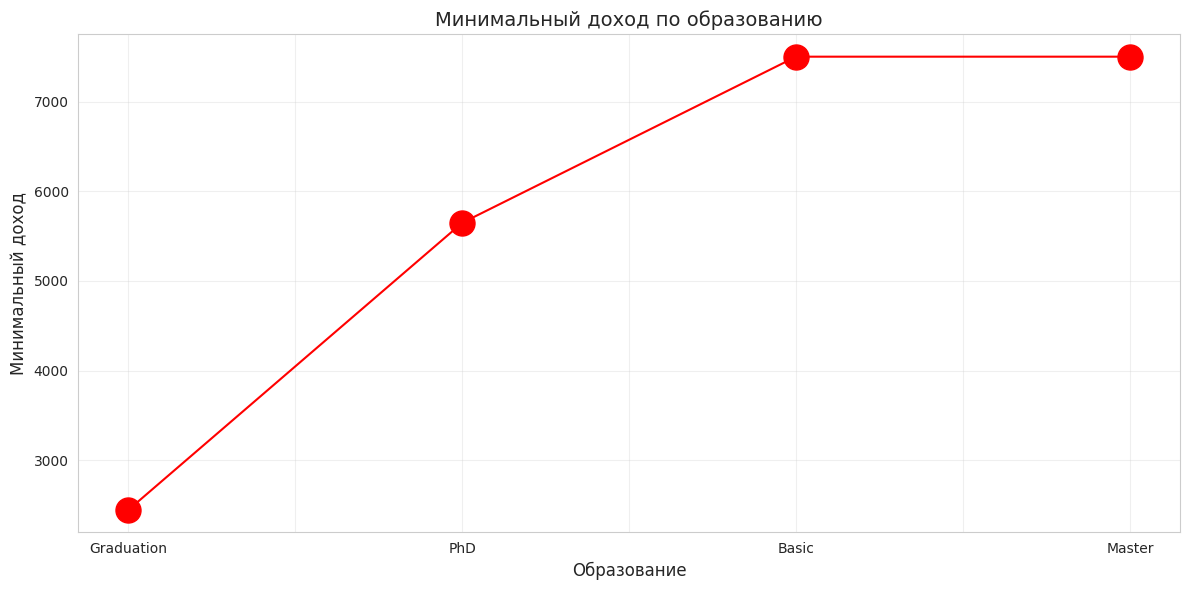

In [31]:
# Сначала нужно подготовить данные - создать очищенный DataFrame
df_clean = df.dropna(subset=['Income'])

# Создаем сводную таблицу с минимальным доходом по образованию
pivot_income = df_clean.pivot_table(values='Income', index='Education', aggfunc='min')

# Сортируем по возрастанию дохода для лучшей визуализации
pivot_income = pivot_income.sort_values('Income')

# Строим график с pandas plot
plt.figure(figsize=(10, 6))
pivot_income.plot(marker='o', markersize=18, color='red', legend=False)
plt.title('Минимальный доход по образованию', fontsize=14)
plt.xlabel('Образование', fontsize=12)
plt.ylabel('Минимальный доход', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Самый высокий минимальный доход у клиентов с образованием Master и Basic - около 7000. Это противоречит ожиданиям, что высшее образование гарантирует больший доход.

Самый низкий минимальный доход у выпускников вузов (Graduation) - около 3000, что очень низко.

PhD находятся посередине - около 5500.

### Задание 3. Использовать matplotlib. Отфильтровать клиентов по year_birth больше 1980. Построить круговую диаграмму, которая отображает процент клиентов каждого семейного положения.

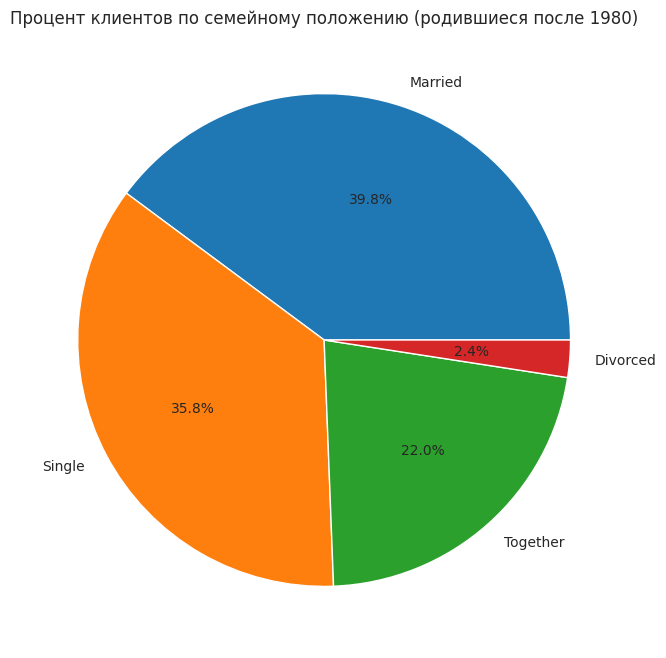

In [25]:
# Фильтруем клиентов по year_birth > 1980
filtered_df = df_clean[df_clean['Year_Birth'] > 1980]

# Считаем количество клиентов по семейному положению
marital_counts = filtered_df['Marital_Status'].value_counts()

# Строим круговую диаграмму с matplotlib
plt.figure(figsize=(8, 8))
plt.pie(marital_counts.values, labels=marital_counts.index, autopct='%1.1f%%')
plt.title('Процент клиентов по семейному положению (родившиеся после 1980)')
plt.show()

Самая большая группа - женатые клиенты (Married) - 39.8%. Почти 40% молодых клиентов состоят в официальном браке.

На втором месте одинокие клиенты (Single) - 25.8%. Каждый четвертый молодой клиент не состоит в отношениях.

Третье место занимают пары в отношениях (Together) - 22.0%.

Самая маленькая группа - разведенные (Divorced) - всего 2.4%, что логично для молодого возраста.

### Выполните минимум один любой график типа hexagonal binning plot. Сделайте выводы.

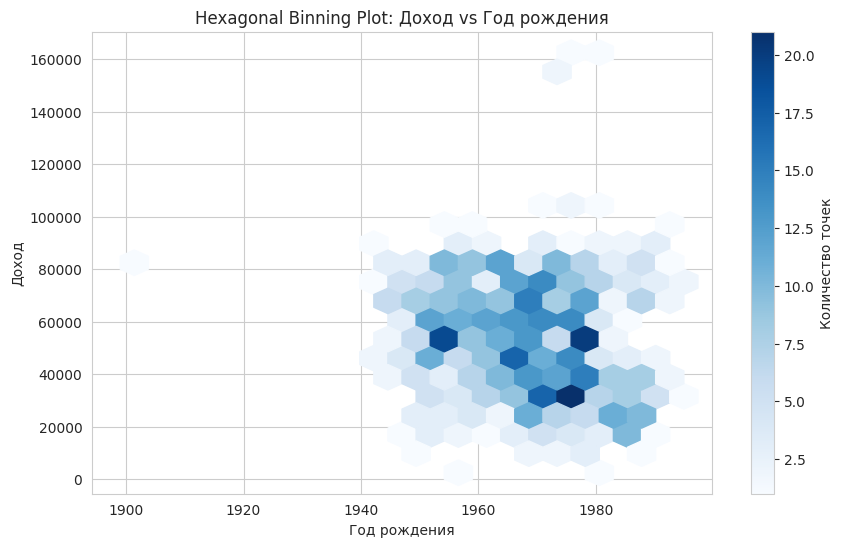

In [26]:
if 'Income' in df_clean.columns and 'Year_Birth' in df_clean.columns:
    plt.figure(figsize=(10, 6))
    plt.hexbin(df_clean['Year_Birth'], df_clean['Income'],
               gridsize=20, cmap='Blues', mincnt=1)
    plt.colorbar(label='Количество точек')
    plt.xlabel('Год рождения')
    plt.ylabel('Доход')
    plt.title('Hexagonal Binning Plot: Доход vs Год рождения')
    plt.show()

На диаграмме hexagonal binning видно плотность распределения клиентов по возрасту и доходу. Чем темнее область, тем больше клиентов в этой группе.

Основная концентрация клиентов находится в области:
  Годы рождения: 1960-1985 (возраст 35-60 лет)
  Доход: 40,000 - 70,000

Самая плотная область (самые темные шестиугольники) соответствует клиентам:

  Родившимся около 1970 года
  С доходом около 30,000-80,000

Мало клиентов в крайних зонах:
  Очень молодые с высоким доходом
  Пожилые с низким доходом
  Очень высокие доходы (свыше 100,000)

### Выполните минимум один график типа boxplot для любого столбца. Сделайте выводы.

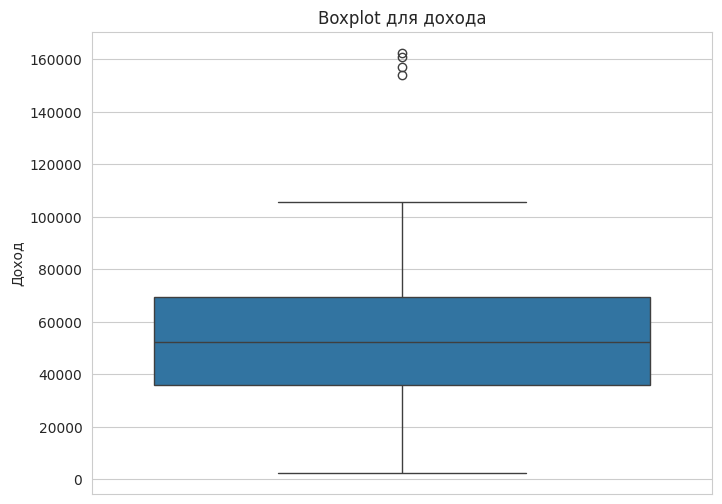

In [27]:
if 'Income' in df_clean.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_clean, y='Income')
    plt.title('Boxplot для дохода')
    plt.ylabel('Доход')
    plt.show()

Средний доход клиентов составляет около 50,000-60,000 (середина прямоугольника). Это типичный уровень дохода для большинства клиентов.

Разброс доходов достаточно большой - от примерно 20,000 до 80,000 (границы прямоугольника). Это показывает, что клиенты имеют разный уровень благосостояния.

Есть много клиентов с высоким доходом - видно несколько точек над верхней границей. Это выбросы, показывающие клиентов с доходом выше 100,000. Таких клиентов немного, но они есть.

Минимальный доход около 0, но таких клиентов очень мало.

Вывод: Основная масса клиентов имеет средний доход 50,000-60,000. Есть небольшая группа богатых клиентов с доходом выше 100,000.

### Добавьте категорию по любому числовому столбцу (например, уровень зарплаты - высокий, низкий, средний). Сделайте boxplot по этому числовому столбцу по каждой новой категории (на boxplot будет box-ы для средней, низкой и высокой зарплаты).

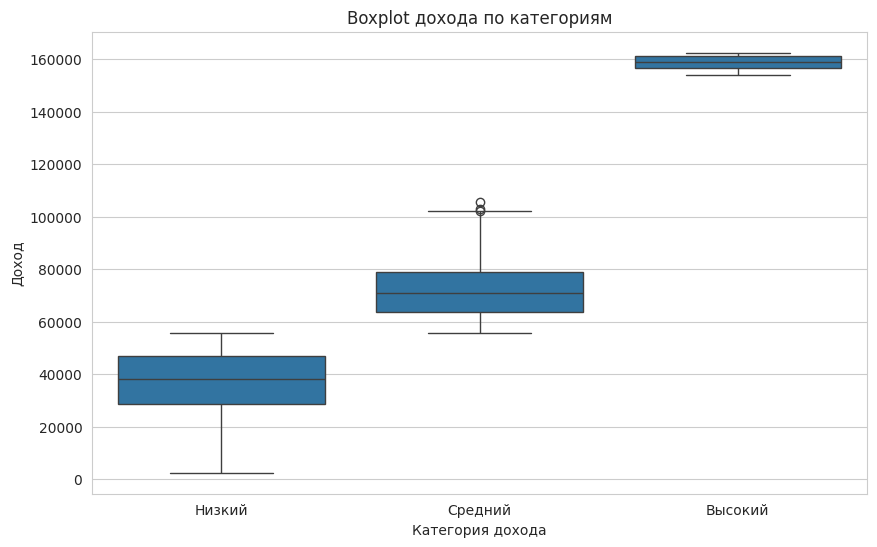

In [33]:
if 'Income' in df_clean.columns:
    # Создаем копию для безопасного изменения
    df_temp = df_clean.copy()

    # Создаем категории дохода
    df_temp['Income_Category'] = pd.cut(df_temp['Income'],
                                       bins=3,
                                       labels=['Низкий', 'Средний', 'Высокий'])

    # Boxplot по категориям
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_temp, x='Income_Category', y='Income')
    plt.title('Boxplot дохода по категориям')
    plt.xlabel('Категория дохода')
    plt.ylabel('Доход')
    plt.show()


На диаграмме видно распределение доходов клиентов по трем категориям: низкий, средний и высокий доход.

Клиенты с низким доходом имеют самый компактный прямоугольник - их доходы сосредоточены в узком диапазоне. Большинство клиентов этой группы имеют доход близкий к минимальному в своей категории.

Клиенты со средним доходом показывают самый большой разброс значений - прямоугольник самый широкий. Это говорит о том, что в этой группе есть значительное разнообразие доходов.

Клиенты с высоким доходом имеют высокую среднюю линию. Есть несколько точек над верхней границей - это клиенты с очень высоким доходом, превышающим типичные значения для этой группы.

Вывод: Разделение доходов на категории хорошо показало различия между группами клиентов. Средняя группа самая разнообразная по доходам, а низкая и высокая группы более однородны.

### Выполните ещё минимум 2 графика boxplot по другим категориям (например,зарплата по полу, зарплата по должности и т.п. - в результате несколько box-ов для каждой категории на ном графике). Используйте для построения графиков разные библиотеки (минимум 2). Сделайте вывод.

1. SEABORN - Доход по образованию:


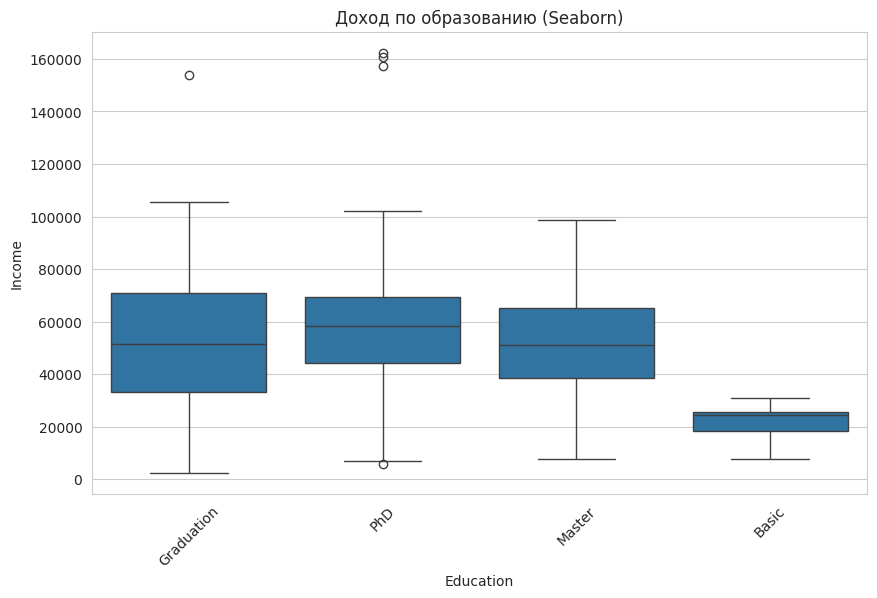

2. MATPLOTLIB - Доход по семейному положению:


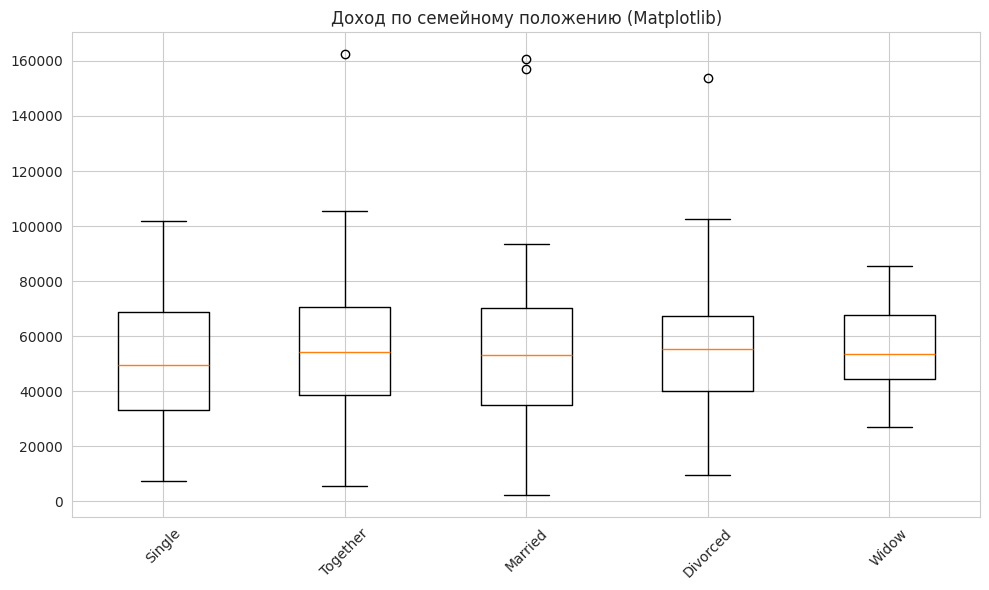

In [32]:
# График 1: seaborn (доход по образованию)
print("1. SEABORN - Доход по образованию:")
if 'Income' in df_clean.columns and 'Education' in df_clean.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_clean, x='Education', y='Income')
    plt.title('Доход по образованию (Seaborn)')
    plt.xticks(rotation=45)
    plt.show()

# График 2: matplotlib (доход по семейному положению) - исправленная версия
print("2. MATPLOTLIB - Доход по семейному положению:")
if 'Income' in df_clean.columns and 'Marital_Status' in df_clean.columns:
    plt.figure(figsize=(10, 6))
    data = [df_clean[df_clean['Marital_Status'] == status]['Income'].dropna()
            for status in df_clean['Marital_Status'].unique()]
    plt.boxplot(data, tick_labels=df_clean['Marital_Status'].unique())  # Исправлено на tick_labels
    plt.title('Доход по семейному положению (Matplotlib)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Первый график (доход по образованию) показывает:
Клиенты с образованием PhD имеют самый высокий средний доход - их прямоугольник расположен выше всех. Магистры занимают второе место по доходам. Выпускники вузов имеют средние показатели. Клиенты с базовым образованием имеют самый низкий доход - их прямоугольник находится ниже всех.

Второй график (доход по семейному положению) показывает:
Вдовцы и вдовы имеют самый высокий средний доход. Женатые клиенты и пары в отношениях имеют схожие показатели дохода. Холостые и разведенные клиенты имеют наименьший средний доход.

Общий вывод:
Образование и семейное положение сильно влияют на доход клиентов. Наибольший доход у людей с высшим образованием и у состоящих в браке или овдовевших.

#### Вывод
В ходе работы были изучены методы визуализации двумерных данных. С помощью 11 различных графиков проанализированы взаимосвязи между признаками клиентской базы.
Было установлено, что образование сильно влияет на доход - клиенты с PhD и Master зарабатывают больше. Возраст также связан с доходом - старшие клиенты богаче. Семейное положение определяет наличие детей - женатые пары чаще имеют детей.
Наибольшая концентрация клиентов приходится на возраст 40-55 лет со средним доходом. Связи между большинством переменных слабые, кроме зависимости дохода от образования и количества детей.
Освоены основные типы визуализации: scatter plot, гистограммы, heatmap, boxplot, hexagonal binning. Получены навыки анализа графиков и выявления закономерностей в данных.